In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 加载数据集
df = pd.read_csv('test_sentiment.csv')
# 检查数据类型和缺失值情况
print('数据基本信息：')
df.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [3]:
# 为每条消息分配一个分数
df['score'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [5]:
# 按年月和发送者分组，计算每月的情绪评分
monthly_score = df.groupby([df['date'].dt.to_period('M'), 'from'])['score'].sum().reset_index()

In [6]:
# 将结果保存为 csv 文件
csv_path = 'test_monthly_score.csv'
monthly_score.to_csv(csv_path)

In [7]:
# 按年月分组，找出每月得分最高的三名员工和得分最低的三名员工
top_3 = monthly_score.groupby('date').apply(lambda x: x.nlargest(3, 'score', keep='all')).reset_index(drop=True)
bottom_3 = monthly_score.groupby('date').apply(lambda x: x.nsmallest(3, 'score', keep='all')).reset_index(drop=True)

In [8]:
# 输出结果
print('月度前三名积极员工：')
print(top_3)
print('最差的三名员工：')
print(bottom_3)

月度前三名积极员工：
       date                         from  score
0   2010-01      kayne.coulter@enron.com      5
1   2010-01     patti.thompson@enron.com      5
2   2010-01       don.baughman@enron.com      4
3   2010-01          eric.bass@enron.com      4
4   2010-01      lydia.delgado@enron.com      4
..      ...                          ...    ...
77  2011-11  bobette.riner@ipgdirect.com      6
78  2011-12      kayne.coulter@enron.com      5
79  2011-12     patti.thompson@enron.com      5
80  2011-12          eric.bass@enron.com      4
81  2011-12      rhonda.denton@enron.com      4

[82 rows x 3 columns]
最差的三名员工：
       date                         from  score
0   2010-01      rhonda.denton@enron.com      0
1   2010-01      johnny.palmer@enron.com      1
2   2010-01  bobette.riner@ipgdirect.com      2
3   2010-02      lydia.delgado@enron.com      1
4   2010-02     patti.thompson@enron.com      1
..      ...                          ...    ...
77  2011-11      rhonda.denton@enron.com     

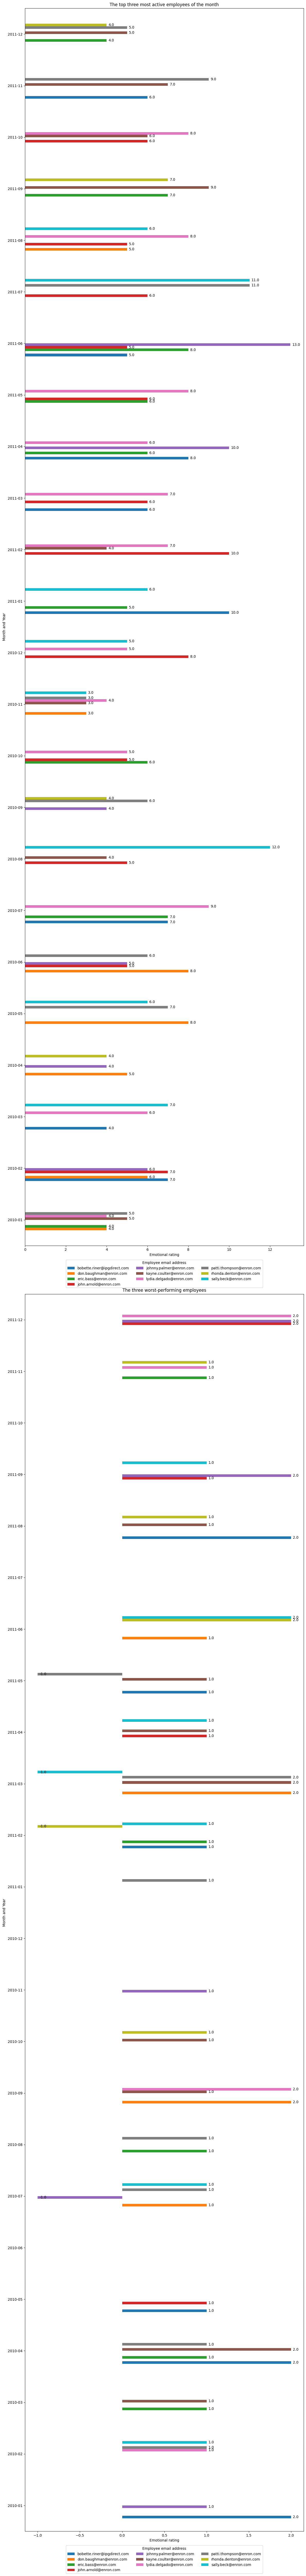

In [9]:
# 创建画布
fig, axes = plt.subplots(2, 1, figsize=(12, 100))

# 绘制月度前三名积极员工柱状图（水平 bar）
top_3_pivot = top_3.pivot(index='date', columns='from', values='score')
top_3_pivot.plot(kind='barh', ax=axes[0])

axes[0].set_title('The top three most active employees of the month')
axes[0].set_xlabel('Emotional rating')
axes[0].set_ylabel('Month and Year')
axes[0].tick_params(axis='y', labelrotation=0)
axes[0].legend(title='Employee email address', loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)

# 添加数据标签
for bar in axes[0].patches:
    width = bar.get_width()
    if width == 0:
        bar.set_visible(False)  # 隐藏 0 宽度的柱子
    else:
        y = bar.get_y() + bar.get_height() / 2
        axes[0].annotate(f'{width:.1f}', xy=(width, y), xytext=(5, 0),
                         textcoords='offset points', ha='left', va='center')

# 绘制最差的三名员工柱状图（水平 bar）
bottom_3_pivot = bottom_3.pivot(index='date', columns='from', values='score')
bottom_3_pivot.plot(kind='barh', ax=axes[1])

axes[1].set_title('The three worst-performing employees')
axes[1].set_xlabel('Emotional rating')
axes[1].set_ylabel('Month and Year')
axes[1].tick_params(axis='y', labelrotation=0)
axes[1].legend(title='Employee email address', loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)

# 添加数据标签
for bar in axes[1].patches:
    width = bar.get_width()
    if width == 0:
        bar.set_visible(False)  # 隐藏 0 宽度的柱子
    else:
        y = bar.get_y() + bar.get_height() / 2
        axes[1].annotate(f'{width:.1f}', xy=(width, y), xytext=(5, 0),
                         textcoords='offset points', ha='left', va='center')

# 自动调整布局
plt.tight_layout()
plt.show()
